Python爬取「科技新報」和「科技報橘」網站，並進一步進行斷詞和共現性分析

In [ ]:
# 載入必要的Python庫
# 要進行網站爬蟲，需要使用Python中的requests、BeautifulSoup和re庫。要進行斷詞和共現性分析，
# 需要使用jieba、pandas、numpy和networkx庫。可以使用以下代碼載入這些庫：
import requests
from bs4 import BeautifulSoup
import re
import jieba
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# 獲取網站數據
# 使用requests庫獲取網站數據。以下是一個簡單的例子：
url_list = ['https://technews.tw/', 'https://buzzorange.com/techorange/']

for url in url_list:
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    news_titles = soup.find_all('h1', class_='entry-title')

    for title in news_titles:
        print(title.text)
# 在上述例子中，我們使用了requests庫獲取了科技新報和動區動趨網站的HTML代碼。
# 然後，我們使用BeautifulSoup庫解析HTML代碼並找到所有新聞標題。
# 最後，我們使用for迴圈遍歷新聞標題，並將它們打印到終端。

In [ ]:
# 斷詞
# 使用jieba庫對新聞標題進行斷詞。以下是一個簡單的例子：
url_list = ['https://technews.tw/', 'https://buzzorange.com/techorange/']
keywords = []

for url in url_list:
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    news_titles = soup.find_all('h1', class_='entry-title')

    for title in news_titles:
        words = jieba.lcut(title.text)
        keywords += [word for word in words if len(word) > 1 and re.match('[\u4e00-\u9fa5]', word)]

print(keywords)
# 在上述例子中，我們使用了jieba庫對所有新聞標題進行了斷詞。
# 我們排除了單個漢字和單個英文字母，並將結果存儲在名為“keywords”的列表中。

### 篩選科技相關詞彙
### 使用正則表達式篩選與科技領域相關的詞彙。以下是一個簡單的例子：

當我們已經斷詞後，我們可以進一步使用正則表達式篩選出與科技相關的詞彙，
例如「人工智慧」、「區塊鏈」、「物聯網」等。
篩選詞彙的方法可以使用正則表達式或是定義一個包含科技相關詞彙的詞典，然後進行匹配。

接下來，我們可以使用pandas庫來計算詞彙的出現頻率，然後將其轉換為一個稀疏矩陣。
這可以使用pandas的get_dummies函數實現，該函數會將詞彙轉換為一個稀疏矩陣。
然後，我們可以使用numpy庫的dot函數計算稀疏矩陣的共現性矩陣。

最後，我們可以使用networkx庫繪製詞彙共現性網絡。
使用networkx庫可以方便地繪製詞彙共現性網絡。
我們可以使用共現性矩陣來創建一個加權圖，然後使用networkx庫的draw函數將圖繪製出來。
我們還可以對圖形進行一些額外的調整，例如調整節點大小和顏色，以及調整邊線的粗細和顏色等。
最後，我們可以使用matplotlib庫來顯示網絡圖。


C:\Users\happy\AppData\Local\Temp\ipykernel_15600\3328464311.py:37: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.get_dummies(tokens)


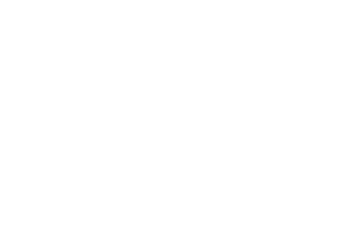

In [2]:
import requests
from bs4 import BeautifulSoup
import jieba
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 爬取科技新報網站
url1 = 'https://technews.tw/'
response1 = requests.get(url1)
soup1 = BeautifulSoup(response1.text, 'html.parser')
news1 = soup1.select('h1.entry-title > a')[:10]  # 取前10筆新聞

# 爬取科技報橘網站
url2 = 'https://buzzorange.com/techorange/'
response2 = requests.get(url2)
soup2 = BeautifulSoup(response2.text, 'html.parser')
news2 = soup2.select('h4.entry-title > a')[:10]  # 取前10筆新聞

# 合併新聞標題
news = [n.text for n in news1] + [n.text for n in news2]

# 定義科技相關詞彙
tech_words = ['人工智慧', '機器學習', '區塊鏈', '物聯網', '雲端運算', '大數據', '虛擬實境']

# 篩選科技相關詞彙並斷詞
tokens = []
for n in news:
    words = jieba.cut(n)
    for w in words:
        if re.match('.*[\u4e00-\u9fa5]+.*', w) and w in tech_words:
            tokens.append(w)

# 計算詞頻並轉換為稀疏矩陣
df = pd.get_dummies(tokens)
co_occurrence = np.dot(df.T, df)

# 繪製共現性網絡圖
G = nx.Graph()
for i, word1 in enumerate(df.columns):
    for j, word2 in enumerate(df.columns):
        if co_occurrence[i, j] > 0:
            G.add_edge(word1, word2, weight=co_occurrence[i, j])

# 調整節點大小和顏色，以及邊線的粗細和顏色
node_size = [df[word].sum()*10 for word in df.columns]
node_color = [np.random.rand(3,) for i in range(len(df.columns))]
edge_width = [d['weight']*0.2 for (u, v, d) in G.edges(data=True)]
edge_color = [np.random.rand(3,) for i in range(len(G.edges))]

# 繪製圖形
pos = nx.spring_layout(G, k=0.3, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='SimHei', font_weight='bold', alpha=0.8)
plt.axis('off')
plt.show()

#### 繪製圖形

這段程式碼會繪製一個圖形，該圖形呈現科技相關詞彙的共現性分析結果，
其中每個節點表示一個詞彙，節點的大小和顏色代表該詞彙在新聞標題中出現的頻率和其所屬的科技領域，
邊線的粗細和顏色則代表兩個詞彙之間的共現頻率。
該圖形可以幫助我們了解科技相關詞彙之間的關聯性，進而發現一些有趣的趨勢和現象。

網站的 HTML 結構有變化：網站可能在更新後更改了 HTML 結構或者 class 名稱，這樣程式碼就無法正確地解析出新聞標題。

網站有防爬機制：為了防止網站被爬蟲爬取，網站可能會增加一些防爬機制，
例如檢測 HTTP 請求頭信息或者設置 Cookie 驗證機制。
如果你沒有處理這些防爬機制，那麼爬蟲就無法正確地獲取網頁內容。

Python 程式碼中的語法或者庫有錯誤：如果你的程式碼中有語法或者庫的錯誤，那麼程式就無法正確地運行。

如果你遇到了無法運行程式碼的問題，可以嘗試檢查以上三點，並且搜尋相關的解決方案。
此外，建議可以逐步地測試程式碼，從爬取網頁內容開始，逐步確認每一個步驟是否正確，以便找到錯誤的原因和解決方案。

如果你的程式碼沒有出現任何 error，但是仍然無法正常運行，可能有以下原因：

網頁的解析方式有誤：網頁可能是動態生成的，而你使用的是靜態爬蟲，因此無法獲取到完整的網頁內容。
這種情況下，你需要使用動態爬蟲來獲取網頁內容。

程式碼中的邏輯錯誤：即使程式碼沒有出現 error，也有可能存在邏輯錯誤，導致程式無法正確運行。
這種情況下，你需要檢查程式碼中每一個步驟是否正確，以及變數是否正確命名和使用。

網頁的讀取時間過長：有些網頁可能需要較長的時間才能夠完全加載，
如果你的程式碼沒有等待網頁完全加載就開始解析，那麼就無法獲取到完整的網頁內容。
這種情況下，你可以使用 Selenium 等工具來模擬人的操作，等待網頁完全加載後再進行解析。

總之，如果你的程式碼沒有出現任何 error，但是仍然無法正常運行，
那麼你需要逐步檢查程式碼中的每一個步驟，以及可能存在的邏輯錯誤、
網頁解析方式、網頁讀取時間等問題，以便找到錯誤的原因和解決方案。

In [148]:
import requests
from bs4 import BeautifulSoup

url_template = 'https://technews.tw/page/{}/'

for i in range(1, 6):   # 爬取前5頁的內容
    url = url_template.format(i)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    news = soup.select('h1.entry-title > a')
    # 在這裡處理爬取到的資料

[<a href="https://technews.tw/2023/03/21/skin-killer/" rel="bookmark" title="空污警報！皮膚科醫生：兩大族群要當心空氣中的「肌膚殺手」">空污警報！皮膚科醫生：兩大族群要當心空氣中的「肌膚殺手」</a>,
 <a href="https://technews.tw/2023/03/21/samsung-display-aps-holding-micro-oled/" rel="bookmark" title="攻 Micro OLED！三星考慮與 APS Holdings 合作，開發 3,500 ppi FMM 技術">攻 Micro OLED！三星考慮與 APS Holdings 合作，開發 3,500 ppi FMM 技術</a>,
 <a href="https://technews.tw/2023/03/21/ipcc-smc/" rel="bookmark" title="學者：增溫 1.5°C 難避免，世紀末可能成常態">學者：增溫 1.5°C 難避免，世紀末可能成常態</a>,
 <a href="https://finance.technews.tw/2023/03/21/aurofac/" rel="bookmark" title="「歐羅肥」所屬企業要掛牌了！全台首家動物藥廠永鴻生技 3 月底興櫃">「歐羅肥」所屬企業要掛牌了！全台首家動物藥廠永鴻生技 3 月底興櫃</a>,
 <a href="https://finance.technews.tw/2023/03/21/tw-jp-2plus2-meeting-cptpp/" rel="bookmark" title="台日執政黨首度 2＋2 實體會議，觸及 CPTPP 議題">台日執政黨首度 2＋2 實體會議，觸及 CPTPP 議題</a>,
 <a href="https://technews.tw/2023/03/21/semiconductors-enhance-electricity-competitiveness/" rel="bookmark" title="提升半導體用電競爭力，工研院提垂直整合等三面向">提升半導體用電競爭力，工研院提垂直整合等三面向</a>,
 <a href="https://te

上為試爬蟲

In [95]:
import requests
from bs4 import BeautifulSoup
import jieba
import jieba.analyse
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams["font.sans-serif"]='Microsoft JhengHei'

In [96]:
# 爬取科技新報網站
url1 = 'https://technews.tw/'
response1 = requests.get(url1)
soup1 = BeautifulSoup(response1.text, 'html.parser')
news1 = soup1.select('h1.entry-title > a')[:200]  # 取前10筆新聞
# news1

In [97]:
##### news1 = soup1.select('h1.entry-title > a')[:10]  # 取前10筆新聞

# 使用 BeautifulSoup 模組來解析 HTML 文件中的標籤，並且選取 <h1 class="entry-title"> 標籤下的 <a> 標籤。
# 具體來說， soup1.select('h1.entry-title > a') 這句程式碼中：soup1 是指使用 BeautifulSoup 解析後的 HTML 文件
# select() 方法可以用來選取符合特定 CSS 選擇器的標籤
# 'h1.entry-title > a' 是 CSS 選擇器，表示選取所有標籤名為 <a>，並且是在標籤名為 <h1>，且 class 屬性值為 "entry-title" 的標籤下的 <a> 標籤。其中 > 符號表示要選取直接子元素。
# 因此，這段程式碼的作用是從 HTML 文件中選取所有標題為 <h1>，且 class 屬性值為 "entry-title" 的標籤下的超連結 <a>。

In [98]:
# 爬取動區動趨網站
url2 = 'https://www.blocktempo.com/category/latest-news/'
response2 = requests.get(url2)
soup2 = BeautifulSoup(response2.text, 'html.parser')
news2 = soup2.select('h3.jeg_post_title > a')[:200]  # 取前10筆新聞
# news2

In [99]:
# 合併新聞標題
news = [n.text for n in news1] + [n.text for n in news2]

In [100]:
orgdata = pd.DataFrame(news, columns=['title'])

In [101]:
orgdata['seg'] = ""
orgdata.head()

,title,seg
0,童子賢：AI 還在中學階段未成熟，取代哪些產業不可知,
1,全球首枚 3D 列印火箭成功發射，惜未進入軌道,
2,意外偏「鷹」連五升！央行總裁楊金龍宣布升息半碼,
3,數位轉型支持戴爾伺服器業績成長，全球裁員台灣同受影響,
4,GitHub 推出支援 GPT-4 的新版 Copilot，工程師動口就可開發程式,


In [135]:
jieba.analyse.set_stop_words('stopwords.txt') #stopwords 自己不要的字的字典(自己建立)
index = 0
for documents in orgdata['title']: #從 csv. 檔中的 JOB_DETAIL 欄位中找尋資料
    seg_list = jieba.analyse.extract_tags(documents) #150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

In [136]:
jieba.load_userdict('./userdict.txt')
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['title']: #從 csv. 檔中的 JOB_DETAIL 欄位中找尋資料
    seg_list = jieba.analyse.extract_tags(documents) #150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

In [137]:
orgdata['seg']

0                   [AI, 還在, 中學階段, 未成熟, 童子, 可知, 哪些, 取代]
1                      [列印, 首枚, 3D, 發射, 進入, 軌道, 火箭, 成功]
2                        [連五升, 總裁, 楊金龍, 半碼, 升息, 意外, 央行]
3             [伺服器, 數位, 轉型, 戴爾, 業績, 成長, 裁員, 同受, 影響, 支持]
4     [GitHub, GPT, Copilot, 師動口, 開發, 程式, 新版, 支援, 工程...
5                [利金, Arm, 調高權, 會聯, 發科, 高通, 已知, 打算, 大幅]
6          [瞄準, 醫療, 千億, 商機, 27, 70, 掛牌, 生光, 智慧, 平台, 上市]
7                 [文生, AI, 繪圖, 直譯, 引熱議, 圖會, 百度, 更新, 快速]
8                [半導, 體業, 不景氣, 南韓, 驅動, IC, 美格, 納縮減, 人力]
9                        [動盪, 結束, 傳東芝, JIP, 圓收, 購要, 接受]
10                    [Siegel, 人們, 比特幣, 信任, 回落, 再次, 重新]
11                  [電池類, 股成長, 空間, 高達, 70%, 謹慎, 三家, 看好]
12               [Fed, 鴿式, 預期, 股逢, 兩大類, 升息, 法人, 布局, 符合]
13                          [喊話民眾, 美國人, 轉移, 資金, 火速, 信心]
14                        [鮑爾, 艱難, 決策, Fed, 打通, 陷入, 金融]
15           [鮑爾, 擴表, 000, 貨幣, 無關, Fed, 將續, 升息, 必要, 政策]
16         [比爾蓋茲, AI, 時代, 點名, OpenAI, GPT, 成企業, 勝出, 關鍵]
17        [拜登, 敵視, 加密貨幣, 價值, 白宮, 報告, 穩定幣, DeFi, 

In [138]:
orgdata.head()

,title,seg
0,童子賢：AI 還在中學階段未成熟，取代哪些產業不可知,"[AI, 還在, 中學階段, 未成熟, 童子, 可知, 哪些, 取代]"
1,全球首枚 3D 列印火箭成功發射，惜未進入軌道,"[列印, 首枚, 3D, 發射, 進入, 軌道, 火箭, 成功]"
2,意外偏「鷹」連五升！央行總裁楊金龍宣布升息半碼,"[連五升, 總裁, 楊金龍, 半碼, 升息, 意外, 央行]"
3,數位轉型支持戴爾伺服器業績成長，全球裁員台灣同受影響,"[伺服器, 數位, 轉型, 戴爾, 業績, 成長, 裁員, 同受, 影響, 支持]"
4,GitHub 推出支援 GPT-4 的新版 Copilot，工程師動口就可開發程式,"[GitHub, GPT, Copilot, 師動口, 開發, 程式, 新版, 支援, 工程..."


In [139]:
# 定義科技相關詞彙
tech_words = ['人工智慧','機器學習','區塊鏈','物聯網','雲端運算','大數據','虛擬實境','FTX',
              '加密貨幣','比特幣','AI','3D列印','GPT-4','ChatGPT','Copilot','AI 繪圖','半導體',
              'Fed','OpenAPI','GPT','穩定幣','DeFi','BitMEX','SVB','USDC','FDIC','Meta','Web3',
              'NFT','Silvergate','Coinbase','ETH','元宇宙','Metaverse','Clubhouse','Decentralizing',
              'AIGC','Bard','Bing','以太坊','擴增實境','虛擬實境','網路安全' ,'智能合約','AR','VR','3D']
# ,'','','','','','','',''

In [140]:
# 篩選科技相關詞彙並斷詞
tokens = []
for n in news:
    words = jieba.cut(n)
    for w in words:
        if w in tech_words:
            tokens.append(w)
#             re.match('.*[\u4e00-\u9fa5]+.*', w) and 

In [141]:
# if re.match('.*[\u4e00-\u9fa5]+.*', w) and w in tech_words:
#             tokens.append(w)

# 這段程式碼是使用 Python 的正規表達式（regular expression）模組 re，來過濾文本中含有中文字符的單詞。同時，只有在該單詞出現在 tech_words 列表中時，才將該單詞加入到 tokens 列表中。
# 具體來說，這段程式碼中：
# re.match() 方法用來對字符串進行正規表達式匹配，其中 '.*[\u4e00-\u9fa5]+.*' 表示匹配任何包含中文字符的字符串。其中 \u4e00-\u9fa5 是 Unicode 中中文字符的範圍。
# w 是循環遍歷文本時讀取到的一個單詞（字符串）。
# and 是 Python 中的邏輯運算符，表示需要滿足前後兩個條件才會執行下面的語句。
# w in tech_words 是判斷 w 是否在 tech_words 列表中，其中 tech_words 是一個包含了某些技術詞彙的列表。
# 如果 w 同時滿足正規表達式中的中文字符匹配和 w 在 tech_words 列表中，就將 w 加入到 tokens 列表中。
# 因此，這段程式碼的作用是過濾文本中含有中文字符的單詞，同時只保留屬於 tech_words 列表的單詞，並將其加入到 tokens 列表中。

In [142]:
print(tokens)

['AI', '3D', 'GPT', 'Copilot', 'AI', '比特幣', 'Fed', 'Fed', 'Fed', 'AI', 'GPT', '加密貨幣', '穩定幣', 'DeFi', '加密貨幣', 'FTX', 'BitMEX', '比特幣', 'FTX', 'FTX', 'ChatGPT', 'FTX', '加密貨幣', 'Copilot']


In [143]:
subdata = pd.DataFrame(tokens)

In [144]:
subdata = orgdata['seg']
subdata_seg_list = subdata.tolist()

flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat) # Counter：dict 的子類別，用來計算可雜湊 ( hashable ) 物件的數量

diction_key = pd.DataFrame(diction.keys())
diction_values = pd.DataFrame(diction.values())
df = [diction_key, diction_values]
result = pd.concat(df, axis=1)
result.columns = ['單字', 'freguency']
result

,單字,freguency
0,AI,3
1,還在,1
2,中學階段,1
3,未成熟,1
4,童子,1
...,...,...
248,28.6,1
249,暴漲,1
250,000%,1
251,募得,1


文字雲

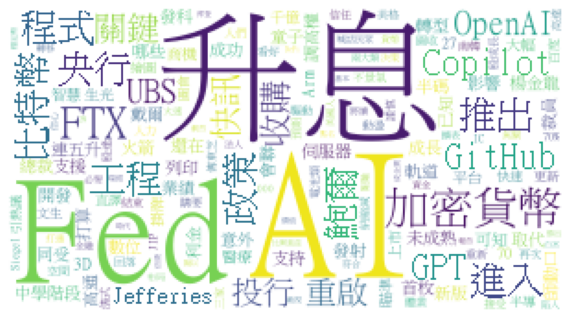

In [145]:
from PIL import Image # PIL：影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

mask = np.array(Image.open("black_rectangle.png")) # 想呈現的圖案形狀
font = "C:\Windows\Fonts\mingliu.ttc" # 選取想呈現字體的字體路徑

# 把文字變成圖片(文字雲)
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

# 調圖片的大小顯示圖片
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [128]:
# 計算詞頻並轉換為稀疏矩陣
df = pd.get_dummies(tokens)
co_occurrence = np.dot(df.T, df)

In [129]:
co_occurrence

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

In [110]:
# 繪製共現性網絡圖
G = nx.Graph()
for i, word1 in enumerate(df.columns):
    for j, word2 in enumerate(df.columns):
        if co_occurrence[i, j] > 0:
            G.add_edge(word1, word2, weight=co_occurrence[i, j])

In [111]:
# 調整節點大小和顏色，以及邊線的粗細和顏色
node_size = [df[word].sum()*10 for word in df.columns]
node_color = [np.random.rand(3,) for i in range(len(df.columns))]
edge_width = [d['weight']*0.2 for (u, v, d) in G.edges(data=True)]
edge_color = [np.random.rand(3,) for i in range(len(G.edges))]

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36008 (\N{CJK UNIFIED IDEOGRAPH-8CA8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24163 (\N{CJK UNIFIED IDEOGRAPH-5E63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDE

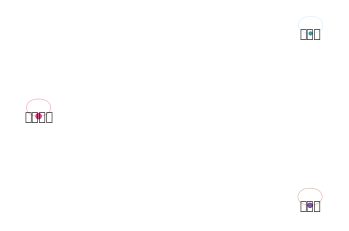

In [112]:
# 繪製圖形
pos = nx.spring_layout(G, k=0.3, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='SimHei', font_weight='bold', alpha=0.8)
plt.axis('off')
plt.show()